# Data Hub Shapes

The shapes in the Data Hub can be organized hirarchical, so you need to prepare your input shapes accordingly. The format is as follows:

In [92]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [93]:
# Example of required structure for import of Shapes into Data Hub
pd.DataFrame([{
    'id': 1,
    'name': 'Germany',
    'type': 'country',
    'parent_id': None,
    'geometry': '...'
},
{
    'id': 2,
    'name': 'Baden-Würtemberg',
    'type': 'state',
    'parent_id': 1,
    'geometry': '...',
},
{
    'id': 3,
    'name': 'Hamburg',
    'type': 'state',
    'parent_id': 1,
    'geometry': '...',
},
{
    'id': 4,
    'name': 'Tübingen',
    'type': 'district',
    'parent_id': 2,
    'geometry': '...'
},
{
    'id': 5,
    'name': 'Reutlingen',
    'type': 'district',
    'parent_id': 2,
    'geometry': '...'
}])

,id,name,type,parent_id,geometry
0,1,Germany,country,NaN,...
1,2,Baden-Würtemberg,state,1.0,...
2,3,Hamburg,state,1.0,...
3,4,Tübingen,district,2.0,...
4,5,Reutlingen,district,2.0,...


# Example preparation of Admin level 0, 1 and 2

See Shape-File download: https://gadm.org/download_country.html

In [94]:
gdf0 = geopandas.read_file('../input/shapes/gadm41_DEU_shp/gadm41_DEU_0.shp')
gdf1 = geopandas.read_file('../input/shapes/gadm41_DEU_shp/gadm41_DEU_1.shp')
gdf2 = geopandas.read_file('../input/shapes/gadm41_DEU_shp/gadm41_DEU_2.shp')

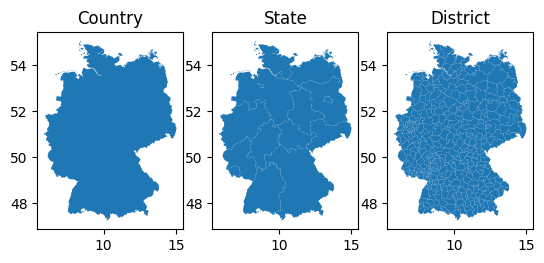

In [95]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3)
gdf0.plot(ax=ax0)
gdf1.plot(ax=ax1)
gdf2.plot(ax=ax2)

ax0.set_title('Country')
ax1.set_title('State')
ax2.set_title('District')

plt.show()

# Prepare level0

In [96]:
gdf0

,GID_0,COUNTRY,geometry
0,DEU,Germany,"MULTIPOLYGON (((7.98642 47.55553, 7.98445 47.5..."


In [97]:
# Remove uneeded columns
gdf0_new = gdf0.drop(columns=['GID_0'])

# Rename
gdf0_new = gdf0_new.rename(columns={'COUNTRY': 'name'})

# Add type columns
gdf0_new['type'] = 'country'
gdf0_new['parent_name'] = pd.NA # this is not applicable for our top-most shape type

In [98]:
gdf0_new

,name,geometry,type,parent_name
0,Germany,"MULTIPOLYGON (((7.98642 47.55553, 7.98445 47.5...",country,<NA>


# Prepare level1

In [99]:
gdf1.head(3)

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,DEU.1_1,DEU,Germany,Baden-Württemberg,NA,NA,Land,State,08,DE.BW,NA,"MULTIPOLYGON (((8.35002 47.57062, 8.34778 47.5..."
1,DEU.2_1,DEU,Germany,Bayern,Bavaria,NA,Freistaat,Free State,09,DE.BY,DE-BY,"POLYGON ((11.41009 47.49540, 11.41005 47.49536..."
2,DEU.3_1,DEU,Germany,Berlin,NA,NA,Land,State,11,DE.BE,DE-BE,"POLYGON ((13.50022 52.61379, 13.49855 52.61068..."


In [100]:
# Remove uneeded columns
gdf1_new = gdf1[['COUNTRY', 'NAME_1', 'geometry']]

# Rename
gdf1_new = gdf1_new.rename(columns={
    'COUNTRY': 'parent_name', 
    'NAME_1': 'name'
})

# Add type columns
gdf1_new['type'] = 'state'

In [101]:
gdf1_new.head(3)

,parent_name,name,geometry,type
0,Germany,Baden-Württemberg,"MULTIPOLYGON (((8.35002 47.57062, 8.34778 47.5...",state
1,Germany,Bayern,"POLYGON ((11.41009 47.49540, 11.41005 47.49536...",state
2,Germany,Berlin,"POLYGON ((13.50022 52.61379, 13.49855 52.61068...",state


# Prepare level2

In [102]:
gdf2.head(3)

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,DEU.1.1_1,DEU,Germany,DEU.1_1,Baden-Württemberg,NA,Alb-Donau-Kreis,NA,NA,Landkreis,District,08425,DE.BW.AD,"POLYGON ((9.67322 48.17136, 9.67410 48.16991, ..."
1,DEU.1.2_1,DEU,Germany,DEU.1_1,Baden-Württemberg,NA,Baden-Baden,NA,NA,Stadtkreis,District,08211,DE.BW.BB,"MULTIPOLYGON (((8.11805 48.73807, 8.11372 48.7..."
2,DEU.1.3_1,DEU,Germany,DEU.1_1,Baden-Württemberg,NA,Biberach,NA,NA,Landkreis,District,08426,DE.BW.BR,"POLYGON ((9.75139 47.97439, 9.75106 47.97507, ..."


In [103]:
# Remove uneeded columns
gdf2_new = gdf2[['NAME_1', 'NAME_2', 'geometry']]

# Rename
gdf2_new = gdf2_new.rename(columns={
    'NAME_1': 'parent_name', 
    'NAME_2': 'name'
})

# Add type columns
gdf2_new['type'] = 'district'

In [104]:
gdf2_new.head(3)

,parent_name,name,geometry,type
0,Baden-Württemberg,Alb-Donau-Kreis,"POLYGON ((9.67322 48.17136, 9.67410 48.16991, ...",district
1,Baden-Württemberg,Baden-Baden,"MULTIPOLYGON (((8.11805 48.73807, 8.11372 48.7...",district
2,Baden-Württemberg,Biberach,"POLYGON ((9.75139 47.97439, 9.75106 47.97507, ...",district


In [105]:
gdf012 = pd.concat([gdf0_new, gdf1_new, gdf2_new]).reset_index(drop=True)
gdf012.insert(0, 'id', range(1, len(gdf012)+1))

In [137]:
def get_id_for_name(name):
    dfx = gdf012[gdf012['name'] == name].reset_index(drop=True)
    
    if (len(dfx) == 0):
        return None
    return dfx.at[0, 'id']

gdf012['parent_id'] = gdf012['parent_name'].apply(get_id_for_name)

In [143]:
gdf012_final = gdf012.drop(columns=['parent_name'])

In [144]:
gdf012_final.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         420 non-null    int64   
 1   name       420 non-null    object  
 2   geometry   420 non-null    geometry
 3   type       420 non-null    object  
 4   parent_id  419 non-null    float64 
dtypes: float64(1), geometry(1), int64(1), object(2)
memory usage: 16.5+ KB


In [145]:
gdf012_final.to_file('../input/shapes/gadm41_DEU_shp/datahub_shapes_DEU.shp', index=False)